In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(color_codes=True)

In [57]:
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

### Read the data and rename columns 

In [2]:
df = pd.read_excel("images_data.xlsx")

In [4]:
df.columns

Index(['Timestamp', 'Score', 'Your Age ', 'Your gender',
       'Your education level (finished)', 'Your country of origin',
       'Have you ever worked on/studied AI?',
       'Have you passed similar kinds of test before?',
       'Is this person real? ',
       'In your opinion, how many people will say that it is a real person? [I say: ]',
       'Is this person real?  ',
       'In your opinion, how many people will say that it is a real person? [I say:]',
       'Is this person real?  .1',
       'In your opinion, how many people will say that it is a real person? [I say:].1',
       'Is this person real?  .2',
       'In your opinion, how many people will say that it is a real person? [I say:].2',
       'Which person is real?  ',
       'In your opinion, how many people will say that the left one person is real and the right one image is generated by AI? [I say:]',
       ' Which person is real?  ',
       'In your opinion, how many people will say that the left one person is 

In [5]:
len(df.columns)

40

In [6]:
column_names = ['ts', 'score', 'age', 'gender', 'education', 'country', 'know_ai', 'similar_tests']

In [7]:
for i in range(1,17):
    column_names.append("q" + str(i))
    column_names.append("wc" + str(i))

In [9]:
df.columns = column_names

In [10]:
df

,ts,score,age,gender,education,country,know_ai,similar_tests,q1,wc1,...,q12,wc12,q13,wc13,q14,wc14,q15,wc15,q16,wc16
0,2019-12-23 14:06:54.633,13,26,M,Bachelor's,Ethiopia,No,No,Probably yes,0.7,...,Probably no,0.1,Definitely right one,0.1,Probably left one,0.6,Probably right one,0.3,Definitely right one,0.1
1,2019-12-23 14:32:50.361,11,27,M,Master's,Georgia,Yes,No,Probably no,0.4,...,Probably yes,0.7,Probably right one,0.3,Definitely left one,0.9,Probably left one,0.6,Probably right one,0.4
2,2019-12-23 14:33:27.483,12,45,M,High school,Ukraine,No,No,Probably no,0.3,...,Probably no,0.4,Definitely right one,0.8,Probably right one,0.8,Definitely left one,0.7,Definitely right one,0.2
3,2019-12-23 15:16:33.222,12,30,M,Master's,Russia,Yes,No,Probably no,0.9,...,Probably no,0.5,Probably right one,0.8,Probably left one,0.2,Definitely left one,0.7,Probably left one,0.2
4,2019-12-23 15:42:37.878,13,24,F,Master's,Russia,Yes,Yes,Probably yes,0.3,...,Probably no,0.2,Probably right one,0.3,Probably left one,0.2,Probably left one,0.2,Definitely right one,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020-01-11 13:04:31.819,12,25,M,High school,Estonia,No,No,Probably yes,0.3,...,Probably no,0.2,Probably right one,0.2,Probably left one,0.2,Probably right one,0.2,Probably right one,0.2
162,2020-01-11 19:45:16.256,11,53,F,Master's,Estonia,No,No,Definitely yes,0.9,...,Probably no,0.8,Definitely right one,0.8,Probably right one,0.8,Probably left one,0.8,Probably right one,0.8
163,2020-01-11 22:08:51.886,10,17,F,Elementary school,Estonia,No,No,Probably yes,0.7,...,Probably no,0.4,Probably right one,0.3,Probably left one,0.9,Probably right one,0.2,Probably right one,0.5
164,2020-01-11 22:12:51.815,13,26,M,Master's,Estonia,Yes,No,Probably yes,0.7,...,Probably yes,0.8,Probably right one,0.7,Probably right one,0.3,Probably left one,0.8,Probably right one,0.3


### Plots

#### 1. Age distribution

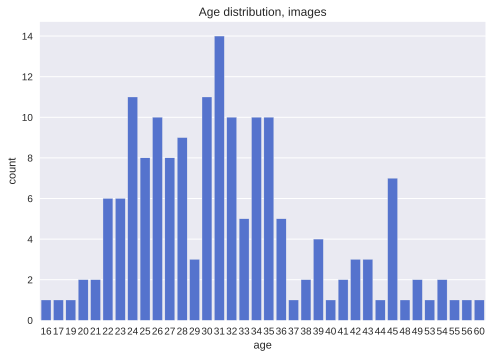

In [59]:
sns.countplot(df['age'], color="royalblue")
plt.title('Age distribution, images')
plt.show()

#### 2. Worked on/studied AI

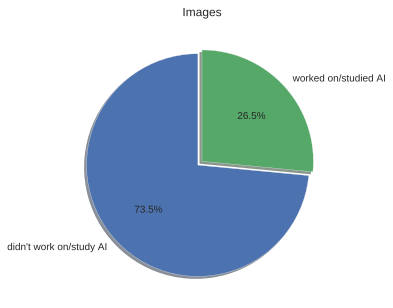

In [65]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['know_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Images")
plt.show()

#### Passed similar tests before

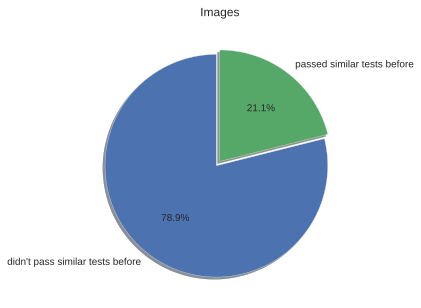

In [66]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['similar_tests'].value_counts(),explode=(0.05,0),labels=["didn't pass similar tests before","passed similar tests before"], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Images")
plt.show()